# THE SPARKS FOUNDATION #GRIPJANUARY22

# AUTHOR: VANSHIKA UJLAYAN 

TASK 2: Prediction Using Unsupervised ML (From the given ‘Iris’ dataset, predict the optimum number of clusters and representing it visually)

DATASET: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

STEP 1: First, we will import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# DATA PREPROCESSING

STEP 2: LOAD THE IRIS DATASET

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
iris_df.shape

(150, 4)

From above we can see that our dataset contains 150 rows and 4 columns.

In [4]:
#Columns
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Description of Dataset

In [5]:
iris_df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

-The mean, or average.

-50% aka Median it is very import to understand Skeweness of the Data.

-The standard deviation, or how spread out the data is.

-The minimum and maximum value of each column

-The number of items that fall within the first, second, and third percentiles.

# Find any null values

In [7]:
null = iris_df.isnull()
print(null)
null_count = null.count()
null_count

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                False             False              False             False
1                False             False              False             False
2                False             False              False             False
3                False             False              False             False
4                False             False              False             False
..                 ...               ...                ...               ...
145              False             False              False             False
146              False             False              False             False
147              False             False              False             False
148              False             False              False             False
149              False             False              False             False

[150 rows x 4 columns]


sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

There are no null values in the iris dataset.

# Data Visualisation

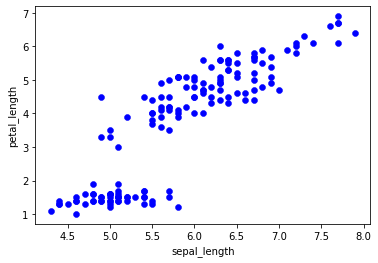

In [8]:
x=iris_df.iloc[:,0]
y=iris_df.iloc[:,2]
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x,y,color='blue',linewidths=0.5)
plt.show()

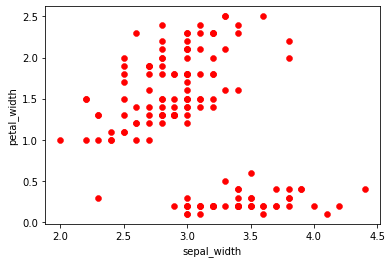

In [9]:
x=iris_df.iloc[:,1]
y=iris_df.iloc[:,3]
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.scatter(x,y,color='red',linewidths=0.5)
plt.show()

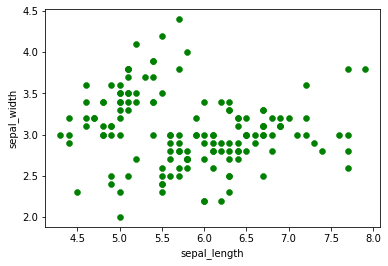

In [10]:
x=iris_df.iloc[:,0]
y=iris_df.iloc[:,1]
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, color='green',linewidths=0.5)
plt.show()

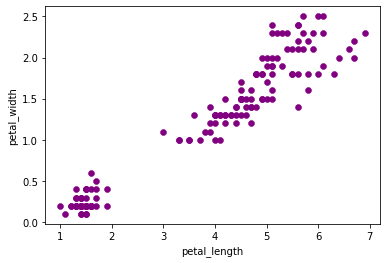

In [11]:
x=iris_df.iloc[:,2]
y=iris_df.iloc[:,3]
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x, y, color='purple',linewidths=0.5)
plt.show()

# WE HAVE CLASSIFIED OUR DATA, NOW FIND THE OPTIMUM NUMBER OF CLUSTERS FOR K-MEANS CLASSIFICATION

In [12]:
#cluster classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

C:\Users\91995\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


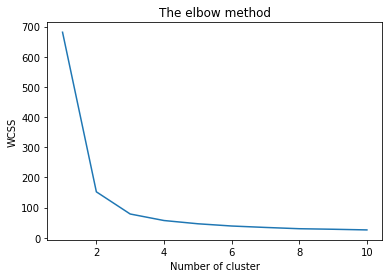

In [13]:
#plotting the result onto a line graph, allowing us to observe the elbow .

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS') 
plt.show()

WCSS : Within cluster sum of squares

We can clearly see why it is called'The Elbow Method' fron above graph, the optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of cluster as 3''.

# PREDICTION

In [14]:
#Applying Kmeans to the dataset 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x) 

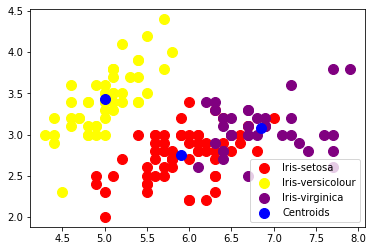

In [15]:
#Visualising the cluster - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()

This shows the clusters present in the given dataset among species setosa, versicolour, virginica.

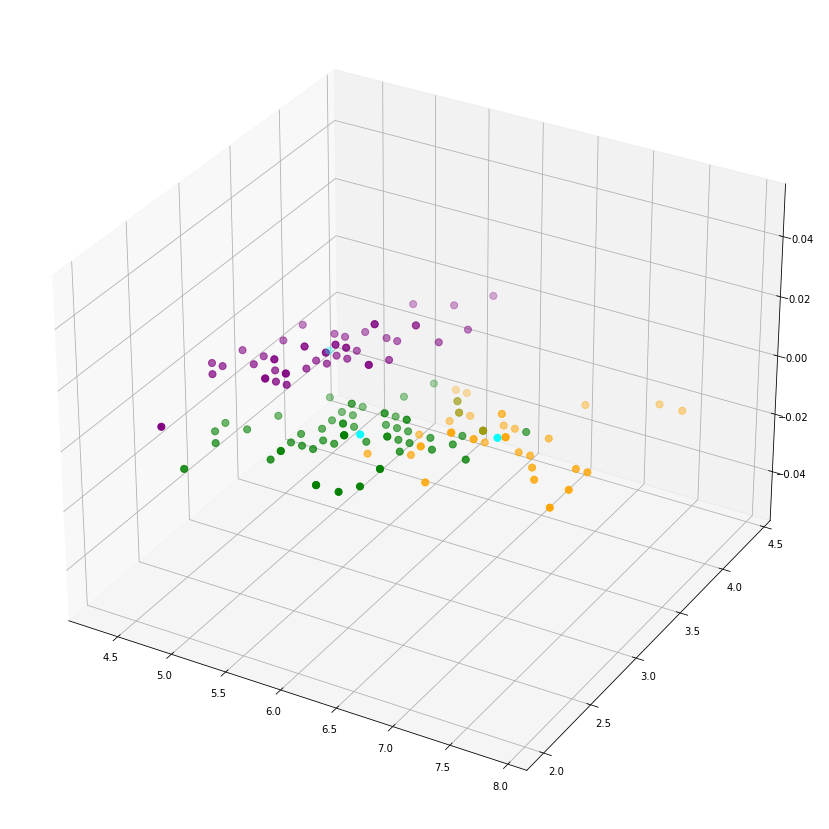

In [16]:
# 3d scatterplot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'orange', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'cyan', label = 'Centroids')
plt.show()